In [2]:
pip install -q fastbook fastai pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
from fastbook import *
from fastai.vision.widgets import *
import pandas as pd

In [4]:
df = pd.read_csv("participants_dataset.csv")
training_data = df[df["label"].notnull()]

print(training_data["label"].values)

leaves = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

['Tomato_healthy' 'Tomato_healthy' 'Tomato_healthy' ... 'Potato___healthy' 'Potato___healthy' 'Potato___healthy']


In [5]:
path = Path('category')
dls = leaves.dataloaders(path)

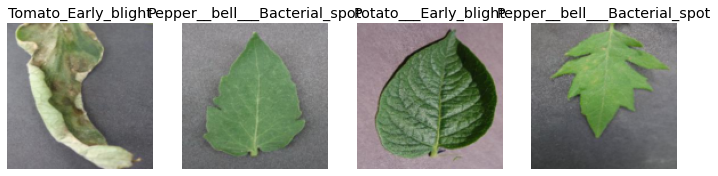

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

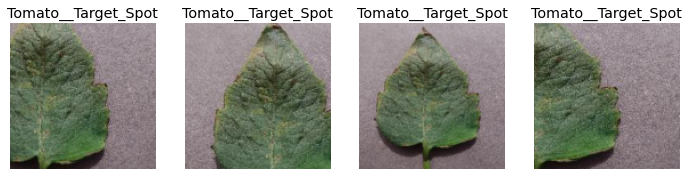

In [7]:
leaves = leaves.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = leaves.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/usr/local/anaconda3/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


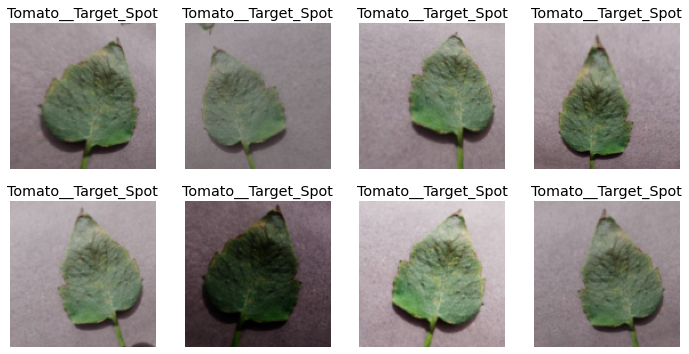

In [8]:
leaves = leaves.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = leaves.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [11]:
leaves = leaves.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = leaves.dataloaders(path)

In [13]:
learn = cnn_learner(dls, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/pierre-emmanuelgoffi/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [14]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 